**Deep Dive into Positional Encoding in the Transformer Neural Network Archirecture**

This notebook accompanies my LinkedIn article on Deep Dive into the Positional Encoding in the Transformer Neural Network Architecture. As explained in my blog, positionial encoding is necessary to capture the order inforamtion. The requireemnts of a mathematical formulation of positional encoding and why a combination of sines and cosines is a  good fit for the formulation of positional encoding in the transformer neural network architecture is discussed in detail in my blog on LinkedIn.

The following is the formulation of positional encoding provided in the paper "Attention Is All You Need".

Prior to going into the math, follwoing points should be noted:

1) The "positional encodings" are to be added to the input embeddings at the bottom of the encoder and decoder stacks.

2) The positional encodings have the same dimension "d_model" as the embeddings so that the two can be summed.

3) There are many choices for positional encodings - learned and fixed.

This notebook goes for fixed as per the "Attention Is All You Need" paper as below:

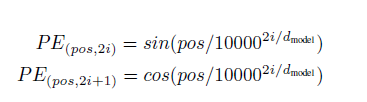


Here:

- "pos" is the position
- "i" is the dimension

That is: each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2 pi to 10000. 2pi

- "d_model" is the vector dimension


In [ ]:
# Let's see some pytorch code to create some positional encodings!
# Let's start by importing torch
# We will also import torch.nn which will provide all the building blocks to
# build neural networks with pytorch
# We will also define max sequence length
# This is the maximum number of words that can be passed into the transformer
# simultaneously

# We will define ma sequence length as 10 here. In reality the max
# sequence length may be in sevral 1000's
# We will define d_model - which is the dimension of the embeddings
# In the paper of Attention Is All You Need, the d_model was 512
# Here, for illustrative purpose we take the d_model as 6

In [19]:
import torch
import torch.nn
max_sequence_length = 10 #this is the max sequence length that can be passed into the transformer simultaneously
d_model = 6

The formulation of positional encoding is given by:

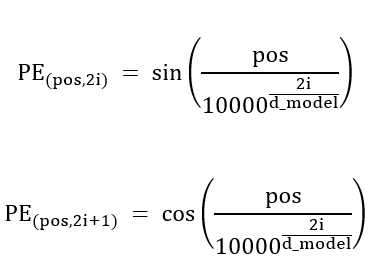


This can be rewritten as:

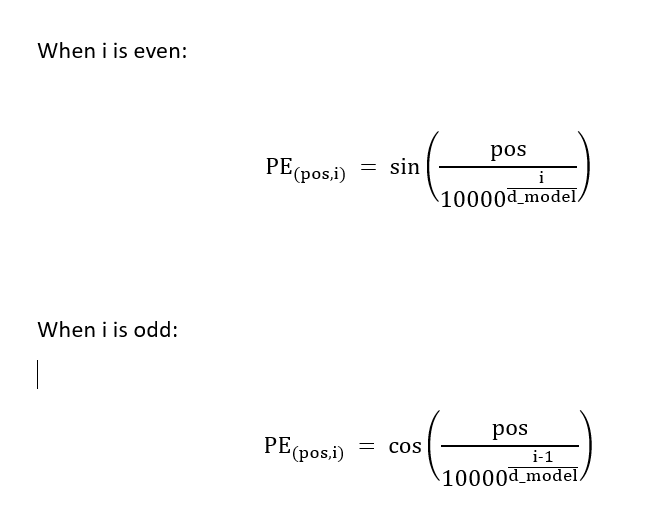

Both these formulae evuate to the same.

In [20]:
even_i = torch.arange(0, d_model, 2).float()   # even indices starting at 0
odd_i = torch.arange(1, d_model, 2).float()    # odd indices starting at 1

In [21]:
#check output
even_i

tensor([0., 2., 4.])

In [22]:
#check output
odd_i

tensor([1., 3., 5.])

In [23]:
# Let us evaluate the above based on the reformulated expressions
# In both the cases - if i is even or i is odd, denominator is the same. Hence:

denominator = torch.pow(10000, even_i / d_model)

In [24]:
#check output
denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
# Next we have to determine every single position for the sequence

In [25]:
position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1) #reshaped as a two dimensional matrix with second dimension as 1

In [26]:
position #get position output

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [27]:
# Now get even and odd position positional encoding

even_PE = torch.sin(position / denominator)
odd_PE =  torch.cos(position / denominator)

In [28]:
#check output
even_PE # max_sequence length is 10, hence 10 elements, each element has 6 as vecor dimension , here 3  - one for each even index

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [29]:
#check output
odd_PE   # max_sequence length is 10, hence 10 elements, each element has 6 as vecor dimension , here 3  - one for each odd index

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [30]:
# Now we want to interleave even_PE and odd_PE starting at the 0th index alternatively between even_PE and odd_PE

stacked = torch.stack([even_PE, odd_PE], dim=2)

In [31]:
stacked.shape

torch.Size([10, 3, 2])

In [32]:
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [33]:
#flatten the stacked elements

#This gives the final positional encoding

PE = torch.flatten(stacked, start_dim=1, end_dim=2)

In [34]:
#cheeck output
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])